In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import folium
from haversine import haversine, Unit
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 22.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [20, 6]

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel('data/거래금액,등락율,전세가율,건축년도,전용면적,관리시설수,주택금융여부.xlsx')
df

,Unnamed: 0,ID,거래금액(만원)_18/1,주택금융가능여부,등락율18/1,전세가율18/1,전용면적,건축년도,거래금액(만원)_18/2,주택금융가능여부.1,...,건축년도.16,거래금액(만원)_22/2,주택금융가능여부.17,등락율,전세가율,전용면적.17,건축년도.17,관리시설수,위도,경도
0,0,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,129125.0,0,4.162633,32.7,80,1987.0,145000.0,0,...,1987.0,218666.7,0,1.7,27.1,80,1987.0,NaN,37.483372,127.053437
1,1,서울특별시 강남구 개포동 개포주공1단지 40,145736.8,0,16.507998,7.0,40,1982.0,162587.5,0,...,1982.0,180000.0,0,0.0,5.6,40,1982.0,NaN,37.483381,127.057068
2,2,서울특별시 강남구 개포동 개포주공5단지 60,136666.7,0,0.000000,31.2,60,1983.0,129500.0,0,...,1983.0,202800.0,0,0.0,21.8,60,1983.0,5.0,37.487868,127.068988
3,3,서울특별시 강남구 개포동 개포주공5단지 80,177416.7,0,0.000000,25.4,80,1983.0,177416.7,0,...,1983.0,282250.0,0,0.0,22.1,80,1983.0,5.0,37.487868,127.068988
4,4,서울특별시 강남구 개포동 개포주공6단지 50,125900.0,0,9.134234,30.1,50,1983.0,128000.0,0,...,1983.0,189000.0,0,0.0,22.8,50,1983.0,3.0,37.488481,127.072502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,4294,서울특별시 중랑구 중화동 중화동건영아파트 60,25000.0,1,6.000000,10.0,60,1998.0,27000.0,1,...,1998.0,47500.0,1,0.0,50.8,60,1998.0,NaN,37.605430,127.082936
4087,4295,서울특별시 중랑구 중화동 태능에셈빌 80,35000.0,1,0.000000,42.9,80,2005.0,36875.0,1,...,2005.0,71000.0,0,0.0,21.1,80,2005.0,NaN,37.599447,127.078938
4088,4296,서울특별시 중랑구 중화동 한신아파트 50,31756.2,1,0.000000,77.4,50,1997.0,32190.0,1,...,1997.0,70000.0,0,0.0,52.9,50,1997.0,5.0,37.595961,127.080314
4089,4297,서울특별시 중랑구 중화동 한신아파트 60,36534.6,1,2.996064,76.9,60,1997.1,38387.5,1,...,1997.1,73000.0,0,0.0,49.5,60,1997.1,5.0,37.595961,127.080314


In [6]:
del df['Unnamed: 0']

In [7]:
df.dropna(inplace=True)

In [9]:
df.head()

,ID,거래금액(만원)_18/1,주택금융가능여부,등락율18/1,전세가율18/1,전용면적,건축년도,거래금액(만원)_18/2,주택금융가능여부.1,등락율.16,...,건축년도.16,거래금액(만원)_22/2,주택금융가능여부.17,등락율,전세가율,전용면적.17,건축년도.17,관리시설수,위도,경도
2,서울특별시 강남구 개포동 개포주공5단지 60,136666.7,0,0.000000,31.2,60,1983.0,129500.0,0,-5.5,...,1983.0,202800.0,0,0.0,21.8,60,1983.0,5.0,37.487868,127.068988
3,서울특별시 강남구 개포동 개포주공5단지 80,177416.7,0,0.000000,25.4,80,1983.0,177416.7,0,0.0,...,1983.0,282250.0,0,0.0,22.1,80,1983.0,5.0,37.487868,127.068988
4,서울특별시 강남구 개포동 개포주공6단지 50,125900.0,0,9.134234,30.1,50,1983.0,128000.0,0,1.6,...,1983.0,189000.0,0,0.0,22.8,50,1983.0,3.0,37.488481,127.072502
5,서울특별시 강남구 개포동 개포주공6단지 60,135200.0,0,9.023669,31.8,60,1983.0,131650.0,0,-2.7,...,1983.0,181000.0,0,0.0,21.7,60,1983.0,3.0,37.488481,127.072502
6,서울특별시 강남구 개포동 개포주공6단지 70,151500.0,0,10.451045,33.2,70,1983.0,150500.0,0,-0.7,...,1983.0,270000.0,0,0.0,21.2,70,1983.0,3.0,37.488481,127.072502


In [10]:
where = df.iloc[:,110:112]
where

,위도,경도
2,37.487868,127.068988
3,37.487868,127.068988
4,37.488481,127.072502
5,37.488481,127.072502
6,37.488481,127.072502
...,...,...
4083,37.604124,127.082326
4084,37.594222,127.075432
4088,37.595961,127.080314
4089,37.595961,127.080314


In [11]:
gongtong = df.iloc[:,109]
gongtong

2       5.0
3       5.0
4       3.0
5       3.0
6       3.0
       ... 
4083    4.0
4084    4.0
4088    5.0
4089    5.0
4090    5.0
Name: 관리시설수, Length: 3295, dtype: float64

In [13]:
df.iloc[:,1:7]

,거래금액(만원)_18/1,주택금융가능여부,등락율18/1,전세가율18/1,전용면적,건축년도
2,136666.7,0,0.000000,31.2,60,1983.0
3,177416.7,0,0.000000,25.4,80,1983.0
4,125900.0,0,9.134234,30.1,50,1983.0
5,135200.0,0,9.023669,31.8,60,1983.0
6,151500.0,0,10.451045,33.2,70,1983.0
...,...,...,...,...,...,...
4083,36300.0,1,13.223140,35.8,80,1991.0
4084,44000.0,1,0.000000,85.2,80,2010.0
4088,31756.2,1,0.000000,77.4,50,1997.0
4089,36534.6,1,2.996064,76.9,60,1997.1


In [14]:
dic = {}
num = 1

for i1 in range(1,19):
    dic[f'data{i1}'] = df.iloc[:,num:num+6]
    dic[f'data{i1}'] = pd.concat([dic[f'data{i1}'],gongtong], axis=1)
    num += 6

dic['data1']

,거래금액(만원)_18/1,주택금융가능여부,등락율18/1,전세가율18/1,전용면적,건축년도,관리시설수
2,136666.7,0,0.000000,31.2,60,1983.0,5.0
3,177416.7,0,0.000000,25.4,80,1983.0,5.0
4,125900.0,0,9.134234,30.1,50,1983.0,3.0
5,135200.0,0,9.023669,31.8,60,1983.0,3.0
6,151500.0,0,10.451045,33.2,70,1983.0,3.0
...,...,...,...,...,...,...,...
4083,36300.0,1,13.223140,35.8,80,1991.0,4.0
4084,44000.0,1,0.000000,85.2,80,2010.0,4.0
4088,31756.2,1,0.000000,77.4,50,1997.0,5.0
4089,36534.6,1,2.996064,76.9,60,1997.1,5.0


In [15]:
dic['data18']

,거래금액(만원)_22/2,주택금융가능여부.17,등락율,전세가율,전용면적.17,건축년도.17,관리시설수
2,202800.0,0,0.0,21.8,60,1983.0,5.0
3,282250.0,0,0.0,22.1,80,1983.0,5.0
4,189000.0,0,0.0,22.8,50,1983.0,3.0
5,181000.0,0,0.0,21.7,60,1983.0,3.0
6,270000.0,0,0.0,21.2,70,1983.0,3.0
...,...,...,...,...,...,...,...
4083,56933.3,1,0.0,83.4,80,1991.0,4.0
4084,78800.0,0,0.0,44.4,80,2010.0,4.0
4088,70000.0,0,0.0,52.9,50,1997.0,5.0
4089,73000.0,0,0.0,49.5,60,1997.1,5.0


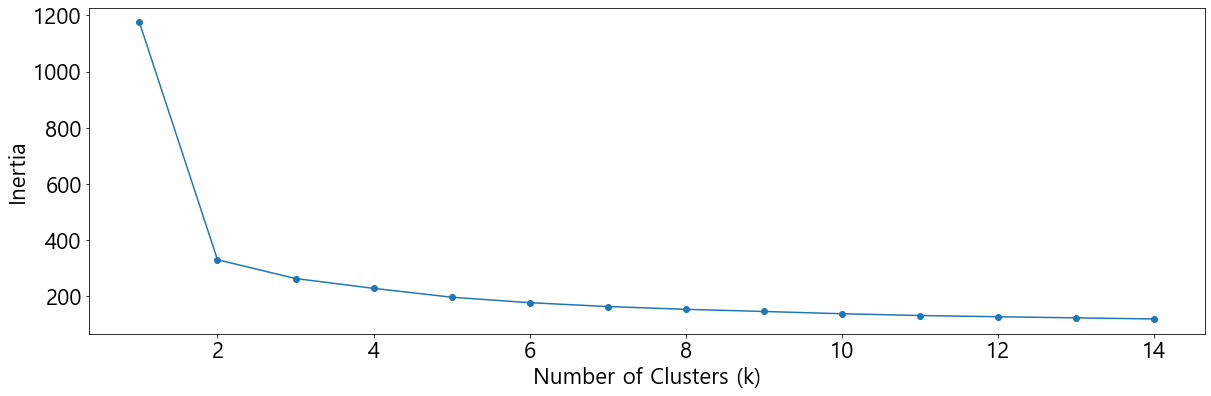

In [16]:
mm = MinMaxScaler()
mm_scaled = mm.fit_transform(dic['data1'])
samples = pd.DataFrame(mm_scaled)

num_clusters = list(range(1, 15))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [18]:
# 스케일링과 클러스터링
mm = MinMaxScaler()
mm_scaled1 = mm.fit_transform(dic['data1'])
mm_scaled2 = mm.fit_transform(dic['data2'])
mm_scaled3 = mm.fit_transform(dic['data3'])
mm_scaled4 = mm.fit_transform(dic['data4'])
mm_scaled5 = mm.fit_transform(dic['data5'])
mm_scaled6 = mm.fit_transform(dic['data6'])
mm_scaled7 = mm.fit_transform(dic['data7'])
mm_scaled8 = mm.fit_transform(dic['data8'])
mm_scaled9 = mm.fit_transform(dic['data9'])
mm_scaled10 = mm.fit_transform(dic['data10'])
mm_scaled11 = mm.fit_transform(dic['data11'])
mm_scaled12 = mm.fit_transform(dic['data12'])
mm_scaled13 = mm.fit_transform(dic['data13'])
mm_scaled14 = mm.fit_transform(dic['data14'])
mm_scaled15 = mm.fit_transform(dic['data15'])
mm_scaled16 = mm.fit_transform(dic['data16'])
mm_scaled17 = mm.fit_transform(dic['data17'])
mm_scaled18 = mm.fit_transform(dic['data18'])

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=np.random.RandomState(seed=1))

clusters1 = kmeans.fit(mm_scaled1)
dic['data1']['cluster'] = clusters1.labels_
clusters2 = kmeans.predict(mm_scaled2)
dic['data2']['cluster'] = clusters2
clusters3 = kmeans.predict(mm_scaled3)
dic['data3']['cluster'] = clusters3
clusters4 = kmeans.predict(mm_scaled4)
dic['data4']['cluster'] = clusters4
clusters5 = kmeans.predict(mm_scaled5)
dic['data5']['cluster'] = clusters5
clusters6 = kmeans.predict(mm_scaled6)
dic['data6']['cluster'] = clusters6
clusters7 = kmeans.predict(mm_scaled7)
dic['data7']['cluster'] = clusters7
clusters8 = kmeans.predict(mm_scaled8)
dic['data8']['cluster'] = clusters8
clusters9 = kmeans.predict(mm_scaled9)
dic['data9']['cluster'] = clusters9
clusters10 = kmeans.predict(mm_scaled10)
dic['data10']['cluster'] = clusters10
clusters11 = kmeans.predict(mm_scaled11)
dic['data11']['cluster'] = clusters11
clusters12 = kmeans.predict(mm_scaled12)
dic['data12']['cluster'] = clusters12
clusters13 = kmeans.predict(mm_scaled13)
dic['data13']['cluster'] = clusters13
clusters14 = kmeans.predict(mm_scaled14)
dic['data14']['cluster'] = clusters14
clusters15 = kmeans.predict(mm_scaled15)
dic['data15']['cluster'] = clusters15
clusters16 = kmeans.predict(mm_scaled16)
dic['data16']['cluster'] = clusters16
clusters17 = kmeans.predict(mm_scaled17)
dic['data17']['cluster'] = clusters17
clusters18 = kmeans.predict(mm_scaled18)
dic['data18']['cluster'] = clusters18

In [19]:
dic['data1'].groupby('cluster').count()

,거래금액(만원)_18/1,주택금융가능여부,등락율18/1,전세가율18/1,전용면적,건축년도,관리시설수
cluster,,,,,,,
0,1898,1898,1898,1898,1898,1898,1898
1,1397,1397,1397,1397,1397,1397,1397


In [20]:
dic['data9'].groupby('cluster').count()

,거래금액(만원)_20/1,주택금융가능여부.8,등락율.9,전세가율.9,전용면적.8,건축년도.8,관리시설수
cluster,,,,,,,
0,1112,1112,1112,1112,1112,1112,1112
1,2183,2183,2183,2183,2183,2183,2183


In [21]:
dic['data18'].groupby('cluster').count()

,거래금액(만원)_22/2,주택금융가능여부.17,등락율,전세가율,전용면적.17,건축년도.17,관리시설수
cluster,,,,,,,
0,341,341,341,341,341,341,341
1,2954,2954,2954,2954,2954,2954,2954


In [23]:
# 스케일링과 클러스터링
mm = MinMaxScaler()
mm_scaled1 = mm.fit_transform(dic['data1'])
mm_scaled2 = mm.fit_transform(dic['data2'])
mm_scaled3 = mm.fit_transform(dic['data3'])
mm_scaled4 = mm.fit_transform(dic['data4'])
mm_scaled5 = mm.fit_transform(dic['data5'])
mm_scaled6 = mm.fit_transform(dic['data6'])
mm_scaled7 = mm.fit_transform(dic['data7'])
mm_scaled8 = mm.fit_transform(dic['data8'])
mm_scaled9 = mm.fit_transform(dic['data9'])
mm_scaled10 = mm.fit_transform(dic['data10'])
mm_scaled11 = mm.fit_transform(dic['data11'])
mm_scaled12 = mm.fit_transform(dic['data12'])
mm_scaled13 = mm.fit_transform(dic['data13'])
mm_scaled14 = mm.fit_transform(dic['data14'])
mm_scaled15 = mm.fit_transform(dic['data15'])
mm_scaled16 = mm.fit_transform(dic['data16'])
mm_scaled17 = mm.fit_transform(dic['data17'])
mm_scaled18 = mm.fit_transform(dic['data18'])

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=np.random.RandomState(seed=1))

clusters1 = kmeans.fit(mm_scaled1)
dic['data1']['cluster'] = clusters1.labels_
clusters2 = kmeans.predict(mm_scaled2)
dic['data2']['cluster'] = clusters2
clusters3 = kmeans.predict(mm_scaled3)
dic['data3']['cluster'] = clusters3
clusters4 = kmeans.predict(mm_scaled4)
dic['data4']['cluster'] = clusters4
clusters5 = kmeans.predict(mm_scaled5)
dic['data5']['cluster'] = clusters5
clusters6 = kmeans.predict(mm_scaled6)
dic['data6']['cluster'] = clusters6
clusters7 = kmeans.predict(mm_scaled7)
dic['data7']['cluster'] = clusters7
clusters8 = kmeans.predict(mm_scaled8)
dic['data8']['cluster'] = clusters8
clusters9 = kmeans.predict(mm_scaled9)
dic['data9']['cluster'] = clusters9
clusters10 = kmeans.predict(mm_scaled10)
dic['data10']['cluster'] = clusters10
clusters11 = kmeans.predict(mm_scaled11)
dic['data11']['cluster'] = clusters11
clusters12 = kmeans.predict(mm_scaled12)
dic['data12']['cluster'] = clusters12
clusters13 = kmeans.predict(mm_scaled13)
dic['data13']['cluster'] = clusters13
clusters14 = kmeans.predict(mm_scaled14)
dic['data14']['cluster'] = clusters14
clusters15 = kmeans.predict(mm_scaled15)
dic['data15']['cluster'] = clusters15
clusters16 = kmeans.predict(mm_scaled16)
dic['data16']['cluster'] = clusters16
clusters17 = kmeans.predict(mm_scaled17)
dic['data17']['cluster'] = clusters17
clusters18 = kmeans.predict(mm_scaled18)
dic['data18']['cluster'] = clusters18

In [24]:
dic['data1'].groupby('cluster').count()

,거래금액(만원)_18/1,주택금융가능여부,등락율18/1,전세가율18/1,전용면적,건축년도,관리시설수
cluster,,,,,,,
0,613,613,613,613,613,613,613
1,1211,1211,1211,1211,1211,1211,1211
2,470,470,470,470,470,470,470
3,687,687,687,687,687,687,687
4,314,314,314,314,314,314,314


In [25]:
dic['data9'].groupby('cluster').count()

,거래금액(만원)_20/1,주택금융가능여부.8,등락율.9,전세가율.9,전용면적.8,건축년도.8,관리시설수
cluster,,,,,,,
0,974,974,974,974,974,974,974
1,830,830,830,830,830,830,830
2,660,660,660,660,660,660,660
3,282,282,282,282,282,282,282
4,549,549,549,549,549,549,549


In [26]:
dic['data18'].groupby('cluster').count()

,거래금액(만원)_22/2,주택금융가능여부.17,등락율,전세가율,전용면적.17,건축년도.17,관리시설수
cluster,,,,,,,
0,899,899,899,899,899,899,899
1,291,291,291,291,291,291,291
2,737,737,737,737,737,737,737
3,50,50,50,50,50,50,50
4,1318,1318,1318,1318,1318,1318,1318
